<a href="https://colab.research.google.com/github/Ahussain24/Cancer-Mortality-Rate/blob/main/Cancer_Mortality_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [315]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [316]:
# import the dataset
df = pd.read_csv('./Data/cancer_reg.csv',encoding='latin-1')

In [317]:
df.shape

(3047, 34)

In [318]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

### Data Cleaning

In [320]:
df['binnedInc']=df['binnedInc'].str.replace('(','')
df['binnedInc']=df['binnedInc'].str.replace('[','')
df['binnedInc']=df['binnedInc'].str.replace(']','')

In [321]:
x=df['binnedInc'].str.split(',',expand=True).astype(float)

In [322]:
x=df['binnedInc'].str.split(',',expand=True).astype(float)
y=(x[0]+x[1])/2
df['binnedInc']=y
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,93564.75,39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,49534.00,33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,49534.00,45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,43962.70,42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,49534.00,48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [323]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,762.000000,3047.000000,3047.000000,3047.000000,2895.000000,3047.000000,3047.000000,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,48878.118280,45.272333,39.570725,42.145323,2.479662,51.773679,18.224450,35.002068,40.977034,6.158287,34.804660,13.282015,54.152642,7.852412,64.354939,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,16889.719362,45.304480,5.226017,5.292849,0.429174,6.896928,8.093064,9.069722,11.115805,4.529059,7.034924,5.394756,8.315064,3.452371,10.647057,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,28429.050000,22.300000,22.400000,22.300000,0.022100,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000,17.600000,0.400000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,38888.250000,37.700000,36.350000,39.100000,2.370000,47.750000,12.800000,29.200000,34.000000,3.100000,30.400000,9.400000,48.600000,5.500000,57.200000,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,46611.300000,41.000000,39.600000,42.400000,2.500000,52.400000,17.100000,34.700000,40.400000,5.400000,35.300000,12.300000,54.500000,7.600000,65.100000,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,52796.000000,44.000000,42.500000,45.300000,2.630000,56.400000,22.700000,40.700000,46.400000,8.200000,39.650000,16.100000,60.300000,9.700000,72.100000,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,93564.750000,624.000000,64.700000,65.700000,3.970000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,42.200000,80.100000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [324]:
print('count of outliers below lower whisker is :',(df['TARGET_deathRate']<df['TARGET_deathRate'].quantile(0.25)-(1.5*(st.iqr(df['TARGET_deathRate'])))).sum())

count of outliers below lower whisker is : 21


In [325]:
print('count of outliers above upper whisker is :',(df['TARGET_deathRate']>df['TARGET_deathRate'].quantile(0.75)+(1.5*(st.iqr(df['TARGET_deathRate'])))).sum())

count of outliers above upper whisker is : 43


In [326]:
#Droping outlier from target variables
#since target variable has outliers less then 10% of the data, drop the outliers
new_df=df[(df['TARGET_deathRate']>df['TARGET_deathRate'].quantile(0.25)-(1.5*(st.iqr(df['TARGET_deathRate']))))&(df['TARGET_deathRate']<df['TARGET_deathRate'].quantile(0.75)+(1.5*(st.iqr(df['TARGET_deathRate']))))]

In [327]:
new_df.shape

(2983, 34)

### Handling Missing Values

In [328]:
new_df.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2241
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          147
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     596
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

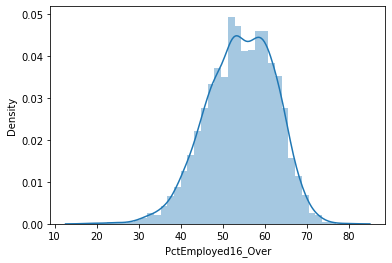

In [329]:
#lets first observe the distribution values in PactEmployed16_over

sns.distplot(a=new_df['PctEmployed16_Over'])

In [330]:
import warnings
warnings.filterwarnings('ignore')
#we can see from the above chart that the  PctEmployed16_Over columns follows a normal distruibution
#where mean = mode = meadian 
#since 'PctEmployed16_Over' have missing value less then 10% it is imputed with median
mean_value = new_df['PctEmployed16_Over'].mean()
new_df['PctEmployed16_Over']=new_df['PctEmployed16_Over'].fillna(value=mean_value)


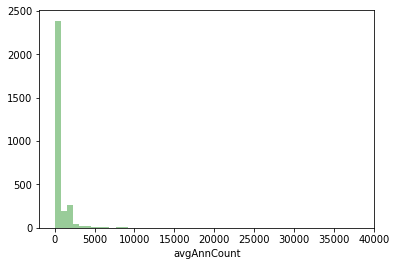

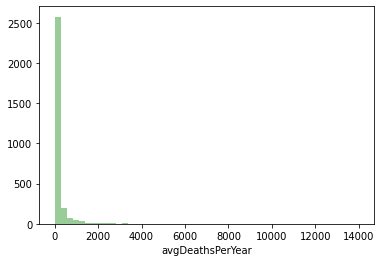

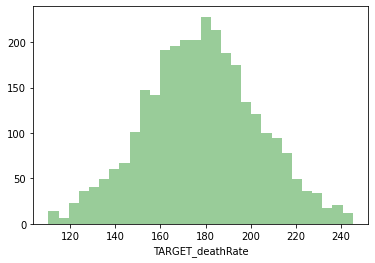

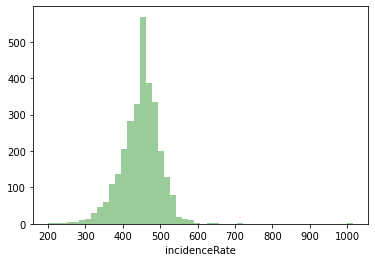

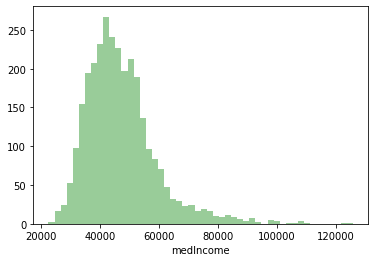

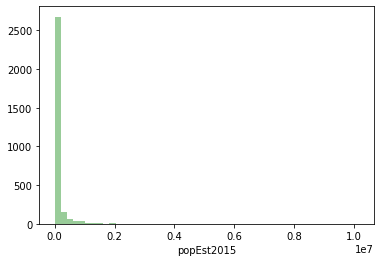

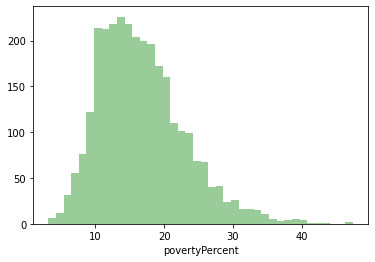

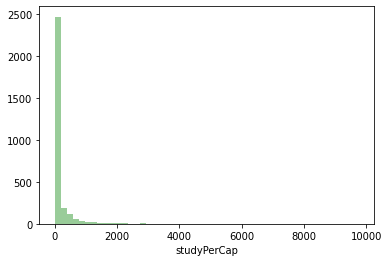

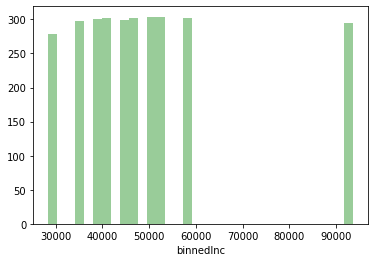

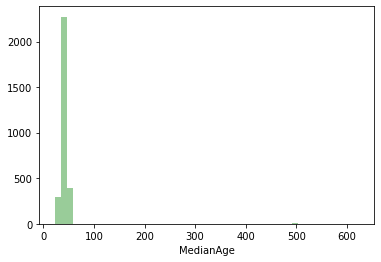

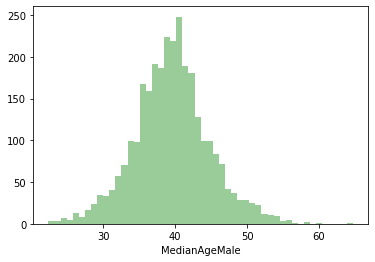

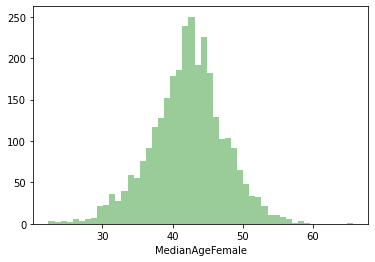

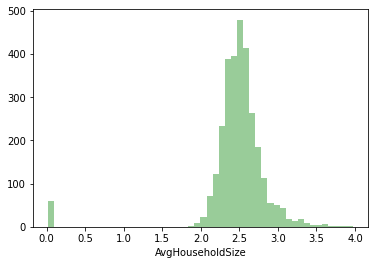

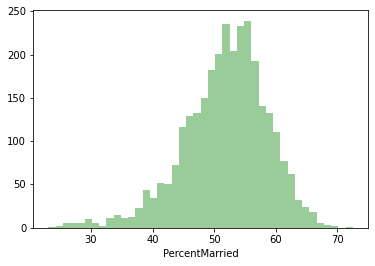

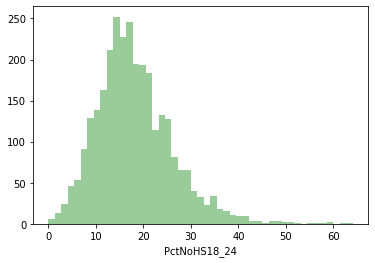

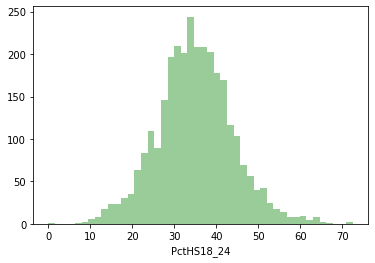

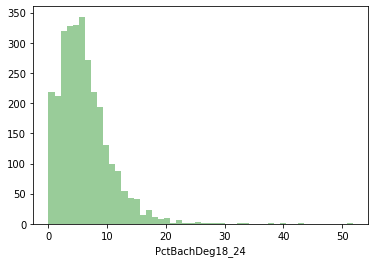

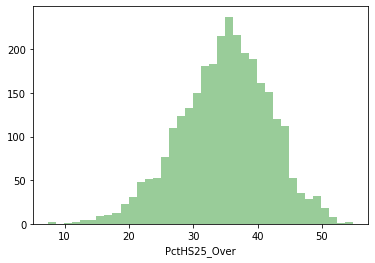

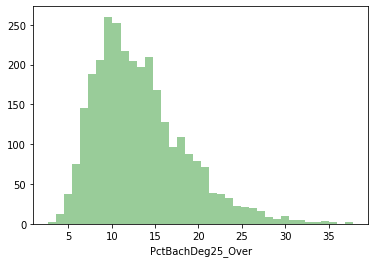

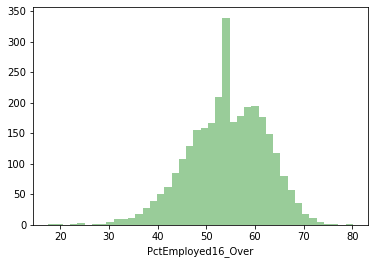

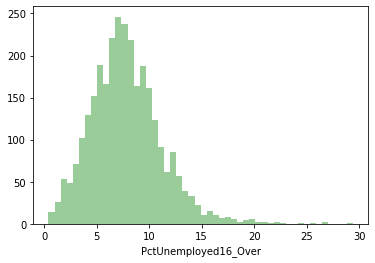

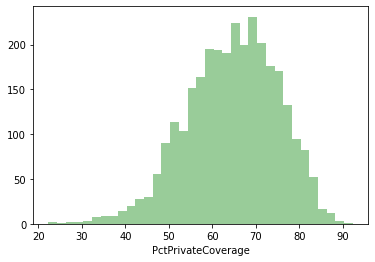

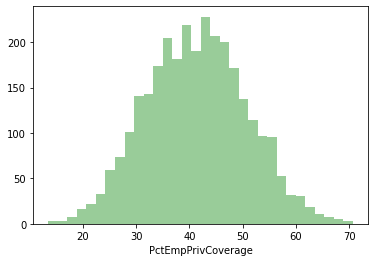

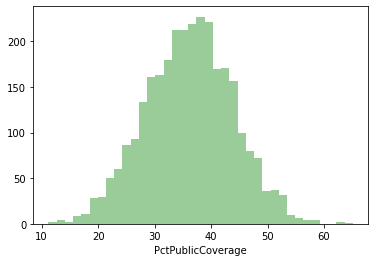

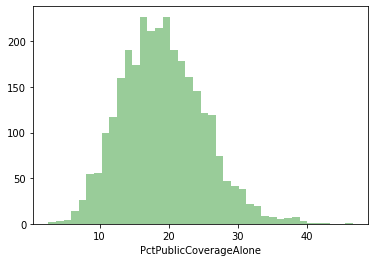

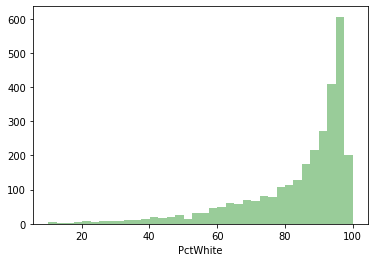

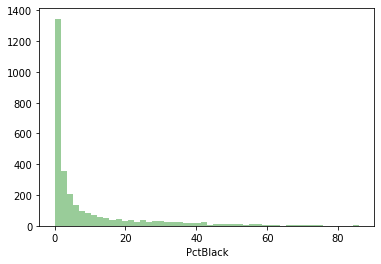

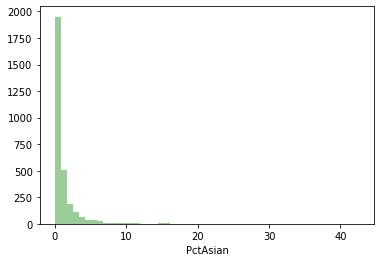

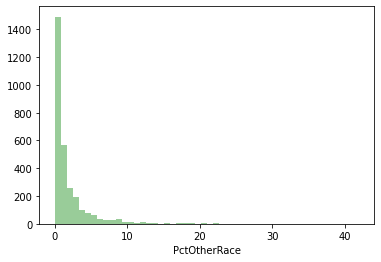

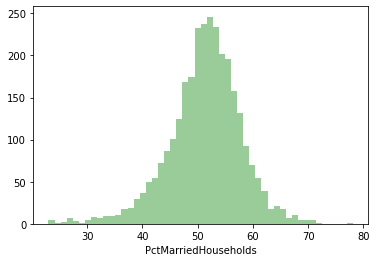

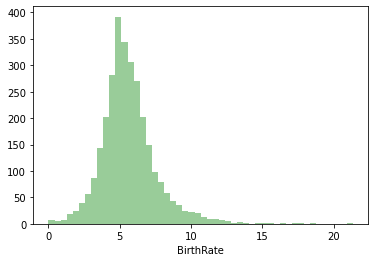

In [331]:
#let us visualize the distribution of features
for i in new_df.columns:
    if (i=='Geography' or i=='PctSomeCol18_24' or i=='PctPrivateCoverageAlone'):
        continue
    else:
        plt.figure()
        sns.distplot(new_df[i],kde=False,color='g')

We can see from charts above that distribution of some features looks skewd (left and right)

In [332]:
# lets find out the correlation among features
# correlation tell us how strongly two feature are related
# it gives us direction as well as magnitude

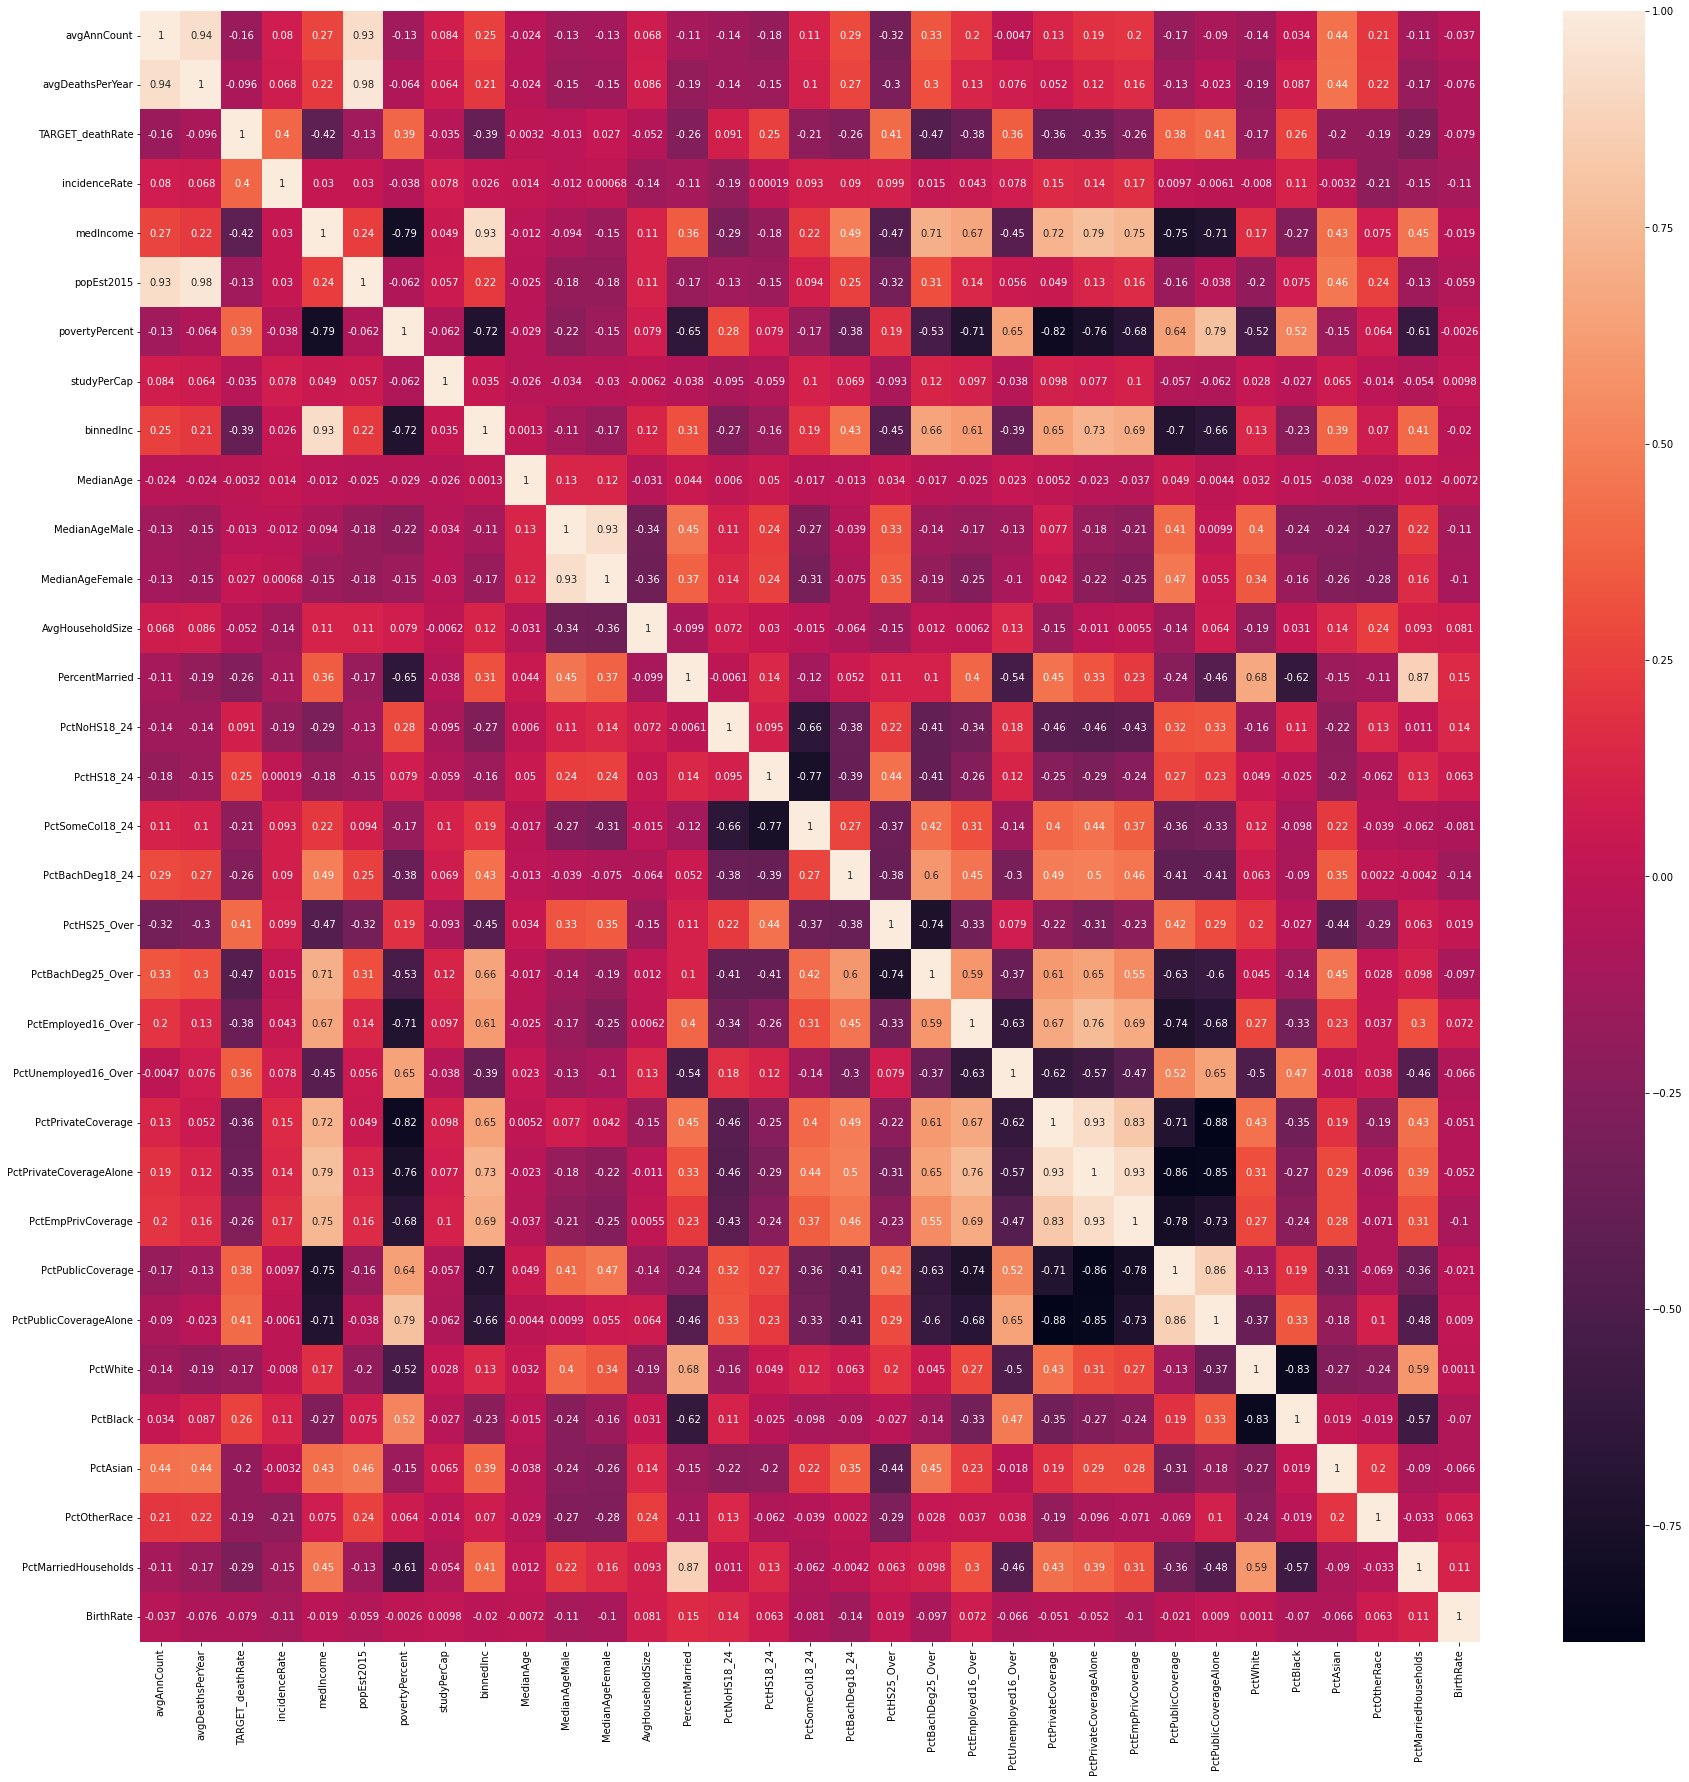

In [333]:
plt.figure(figsize=(30,30))
sns.heatmap(new_df.corr(),annot=True)


We can see from the heatmap above  that there lies  multicollinarity  among the variables

### Feature Selection

In [334]:
import statsmodels.api as sm
import warnings 

warnings.filterwarnings('ignore')

In [335]:
#drop the 'geography' ,'pctsomecol18_24' ,'pctprivatecoveragealone' as they have the most missing values.
# drop the dependent variable 

X = new_df.drop(['Geography' ,'PctSomeCol18_24','PctPrivateCoverageAlone','TARGET_deathRate'],axis=1)
X_constant = sm.add_constant(X)


y=new_df['TARGET_deathRate']
y1=list(y)

In [336]:
model = sm.OLS(y1,X_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     92.55
Date:                Sat, 25 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:40:40   Log-Likelihood:                -12850.
No. Observations:                2983   AIC:                         2.576e+04
Df Residuals:                    2952   BIC:                         2.595e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    184.9547     14.998     12.332      0.000     155.547     214.362
avgAnnCount               -0.0039      0.001     -5.361      0.000      -0.005      -0.002
avgDeathsPerYear           0.0199      0.004      5.433      0.000       0.013       0.027
incidenceRate              0.1682      0.007     23.285      0.000       0.154       0.182
medIncome              -3.105e-05      0.000     -0.302      0.763      -0.000       0.000
popEst2015             -1.585e-05   5.12e-06     -3.094      0.002   -2.59e-05    -5.8e-06
povertyPercent            -0.0566      0.158     -0.358      0.720      -0.366       0.253
studyPerCap               -0.0002      0.001     -0.283      0.777      -0.001       0.001
binnedInc              -1.736e-05   5.33e-05     -0.326      0.745      -0.000    8.72e-05
MedianAge                 -0.0056      0.007     -0.751      0.453      -0.020       0.009
MedianAgeMale             -0.5836      0.199     -2.927      0.003      -0.975      -0.193
MedianAgeFemale           -0.0225      0.207     -0.109      0.913      -0.428       0.383
AvgHouseholdSize           0.5059      0.911      0.555      0.579      -1.281       2.293
PercentMarried             1.0500      0.161      6.511      0.000       0.734       1.366
PctNoHS18_24              -0.0898      0.054     -1.678      0.093      -0.195       0.015
PctHS18_24                 0.1892      0.047      4.013      0.000       0.097       0.282
PctBachDeg18_24            0.0176      0.104      0.170      0.865      -0.186       0.222
PctHS25_Over               0.4592      0.093      4.963      0.000       0.278       0.641
PctBachDeg25_Over         -1.0458      0.150     -6.979      0.000      -1.340      -0.752
PctEmployed16_Over        -0.4717      0.096     -4.920      0.000      -0.660      -0.284
PctUnemployed16_Over       0.2912      0.160      1.822      0.069      -0.022       0.605
PctPrivateCoverage        -0.4599      0.126     -3.661      0.000      -0.706      -0.214
PctEmpPrivCoverage         0.2849      0.099      2.881      0.004       0.091       0.479
PctPublicCoverage         -0.2933      0.218     -1.349      0.178      -0.720       0.133
PctPublicCoverageAlone     0.2506      0.271      0.925      0.355      -0.281       0.782
PctWhite                  -0.0912      0.056     -1.631      0.103      -0.201       0.018
PctBlack                   0.0034      0.054      0.064      0.949      -0.103       0.109
PctAsian                   0.0343      0.178      0.192      0.848      -0.315       0.384
PctOtherRace              -0.8398      0.118     -7.132      0.000      -1.071      -0.609
PctMarriedHouseholds      -1.1048      0.153     -7.217      0.000      -1.405      -0.805
BirthRate                 -0.7573      0.185     -4.093      0.000      -1.120  

In [337]:
#Durbin-Watson score is 1.789 which indicates there lies no autocorrelation between the dependent features

Check for Multicolliniarity with Variation Inflation Factor(VIF)

In [338]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [339]:
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
avgAnnCount,10.000595
avgDeathsPerYear,31.835562
incidenceRate,1.269426
medIncome,13.837560
popEst2015,26.477856
povertyPercent,8.812483
studyPerCap,1.051186
binnedInc,7.324396
MedianAge,1.026657
MedianAgeMale,9.888816


In [340]:
# features having high multicollinarity

vif_=pd.DataFrame({'vif': vif[1:]}, index=X.columns)
vif_[vif_['vif']>10]


,vif
avgAnnCount,10.000595
avgDeathsPerYear,31.835562
medIncome,13.837560
popEst2015,26.477856
MedianAgeFemale,10.869920
PercentMarried,11.066939
PctPrivateCoverage,15.848983
PctPublicCoverage,25.655095
PctPublicCoverageAlone,23.665094


In [341]:
#features which as passed the OLS test  
features=[]

tmp = model.pvalues
for i in range(tmp.shape[0]):
    if  tmp[i] < 0.05:
        features.append(tmp.index[i])
    else:
        continue
print(features)

['const', 'avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'popEst2015', 'MedianAgeMale', 'PercentMarried', 'PctHS18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']


In [342]:
#select only relevent features
X=new_df[[ 'avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'popEst2015', 'MedianAgeMale', 'PercentMarried', 'PctHS18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']]

In [343]:
X.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,popEst2015,MedianAgeMale,PercentMarried,PctHS18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,489.8,260131,36.9,52.5,39.5,23.2,19.6,51.9,75.1,41.6,1.843479,52.856076,6.118831
1,173.0,70,411.6,43269,32.2,44.5,22.4,26.0,22.7,55.9,70.2,43.6,3.741352,45.372500,4.333096
2,102.0,50,349.7,21026,44.0,54.2,36.6,29.0,16.0,45.9,63.7,34.9,2.747358,54.444868,3.729488
3,427.0,202,430.4,75882,42.2,52.7,41.2,31.6,9.3,48.3,58.4,35.0,1.362643,51.021514,4.603841
4,57.0,26,350.1,10321,47.8,57.8,43.0,33.4,15.0,48.2,61.6,35.1,0.492135,54.027460,6.796657


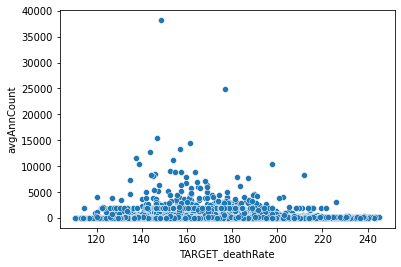

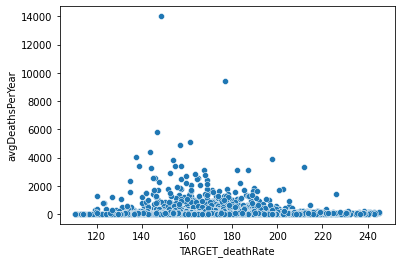

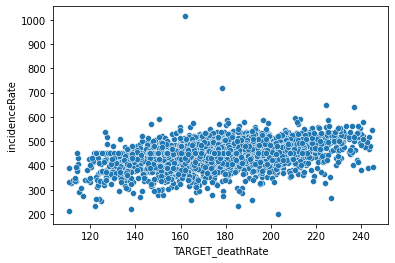

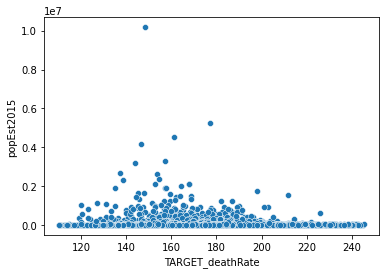

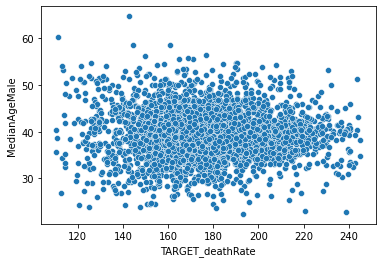

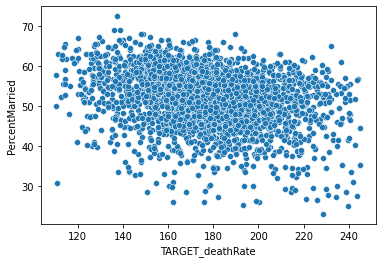

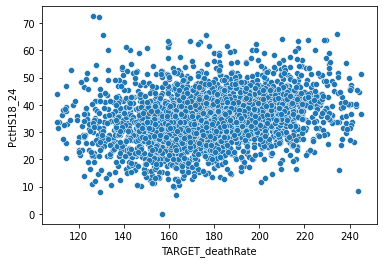

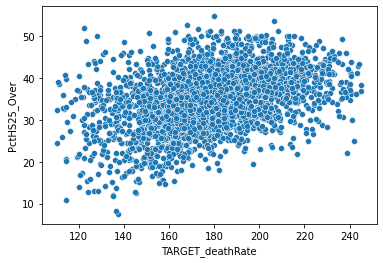

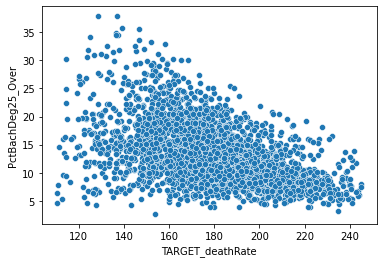

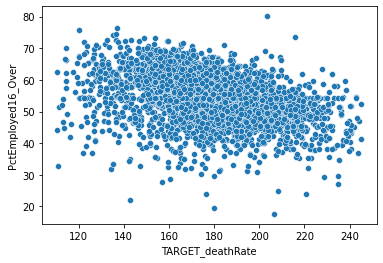

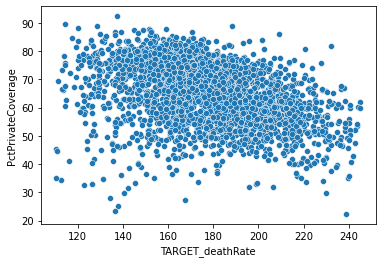

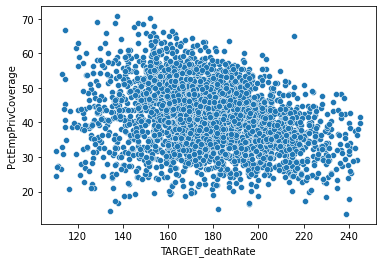

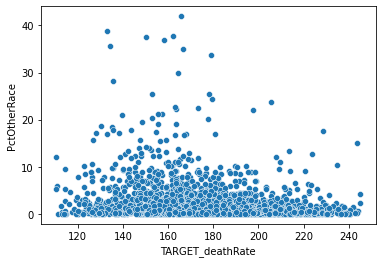

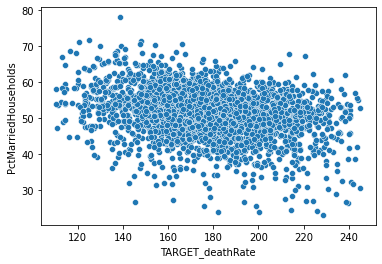

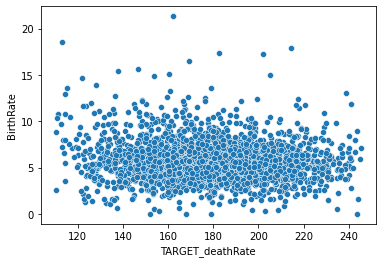

In [344]:
# Scatter plot to check the linear relation between each independent feature and  the dependent feature
for i in X.columns:
    plt.figure()
    sns.scatterplot(x=new_df['TARGET_deathRate'],y=i,data=new_df)

Distribution of features before transformation 

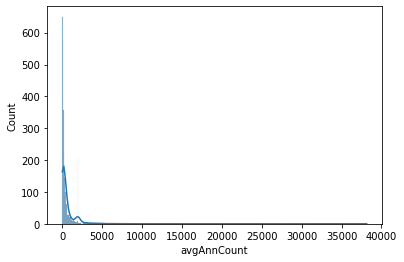

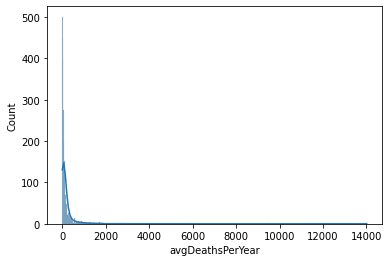

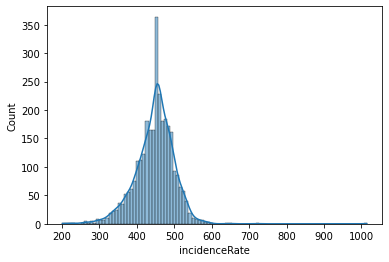

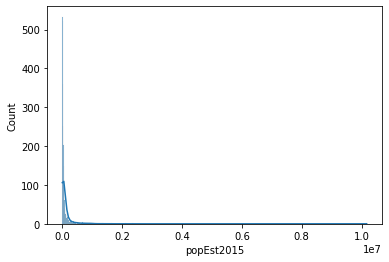

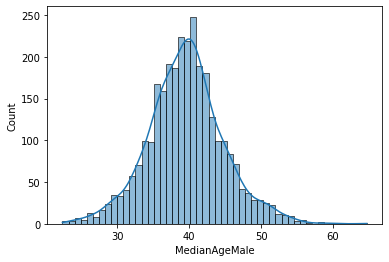

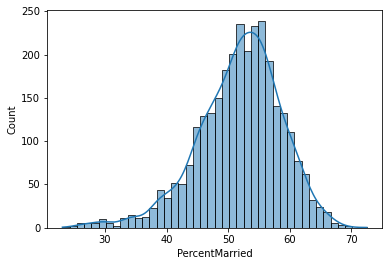

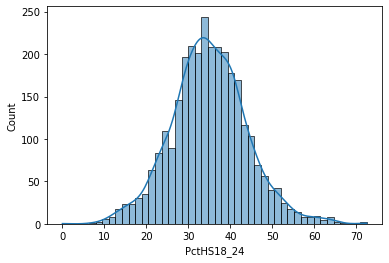

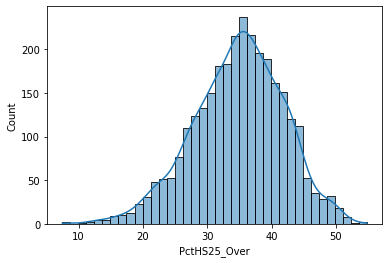

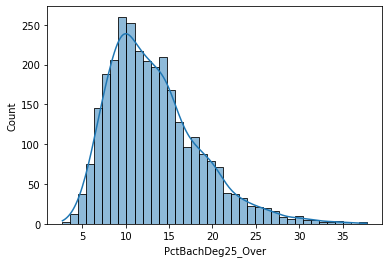

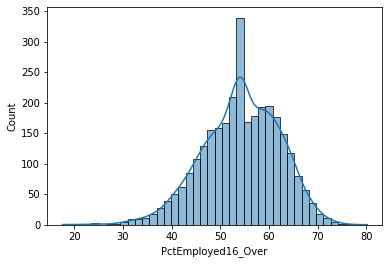

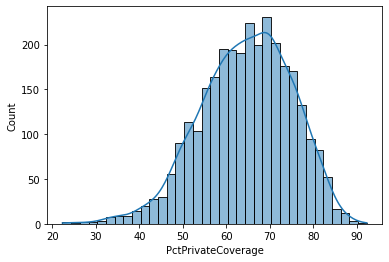

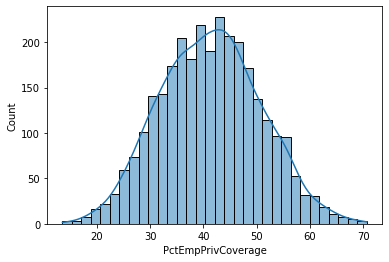

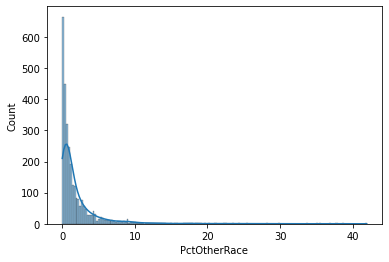

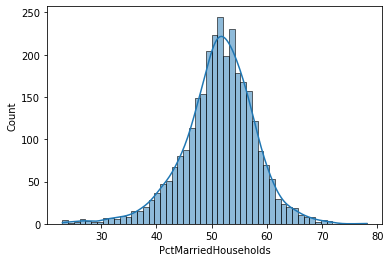

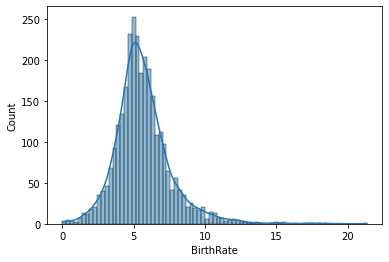

In [345]:
#Visualize the distribuiton of data before transformation
for i in X.columns:
        plt.figure()
        sns.histplot(X[i],kde=True)

In [346]:
#from distributions chart we observed that some features distribuition were skewd 

cols=[]

for i in  X.columns:
    if st.shapiro(X[i])[1] < 0.05:
        cols.append(i)
    else:
        continue
print(cols)

['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'popEst2015', 'MedianAgeMale', 'PercentMarried', 'PctHS18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']


In [347]:
tmp_df=X[nor]

In [348]:
'''Select the feature that are skewd (left and right)
'''
right=[]
left=[]
for i in  tmp_df.columns:
    if st.skew(tmp_df[i])>0.5:
        right.append(i)
    elif st.skew(tmp_df[i])<-0.5:
            left.append(i)
    else:
        continue
print('right skwed :\n ', right,'\n\nleft skwed :\n ',left)

right skwed :
  ['avgAnnCount', 'avgDeathsPerYear', 'popEst2015', 'PctBachDeg25_Over', 'PctOtherRace', 'BirthRate'] 

left skwed :
  ['PercentMarried', 'PctMarriedHouseholds']


In [349]:
#convert features having skewd dsitribution (left and right) to log normal distribution

tmp_df['avgDeathsPerYear']=np.log((tmp_df['avgDeathsPerYear']))
tmp_df['avgAnnCount']=np.log((tmp_df['avgAnnCount']))
tmp_df['popEst2015']=np.log((tmp_df['popEst2015']))
tmp_df['PctBachDeg25_Over']=np.log((tmp_df['PctBachDeg25_Over']))
tmp_df['PctOtherRace']=(np.log((tmp_df['PctOtherRace'])+1))
tmp_df['BirthRate']=np.sqrt((tmp_df['BirthRate']))
tmp_df['PercentMarried']=((tmp_df['PercentMarried'])**2)
tmp_df['PctMarriedHouseholds']=((tmp_df['PctMarriedHouseholds'])**2)



In [350]:
#After log normal transformation
for i in tmp_df:
    a=st.skew(tmp_df[i])
    print(i,':  ',a)

avgAnnCount :   0.33480112525630185
avgDeathsPerYear :   0.41544063495841105
incidenceRate :   -0.0656492637185816
popEst2015 :   0.5023113369420232
MedianAgeMale :   0.14108181837354597
PercentMarried :   -0.15927316028813485
PctHS18_24 :   0.175607975324238
PctHS25_Over :   -0.30819745919432034
PctBachDeg25_Over :   -0.04638513379945553
PctEmployed16_Over :   -0.3769699049731866
PctPrivateCoverage :   -0.38097253521641244
PctEmpPrivCoverage :   0.08284073271539542
PctOtherRace :   1.2103849245236493
PctMarriedHouseholds :   0.09417968044104384
BirthRate :   0.006710459376733097


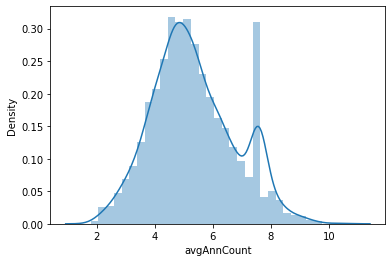

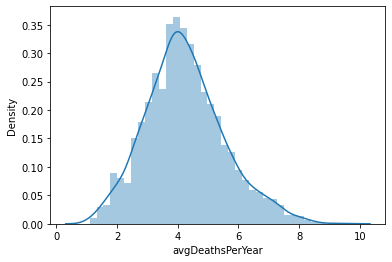

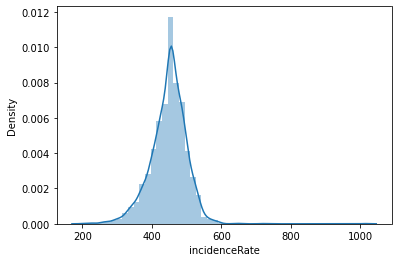

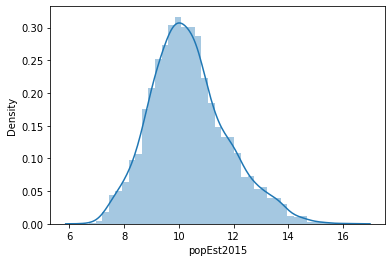

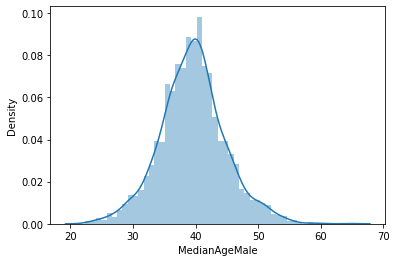

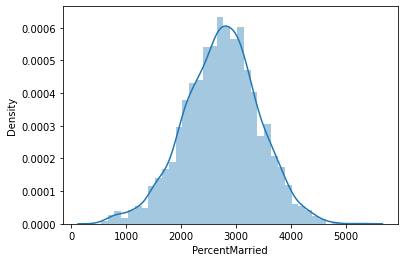

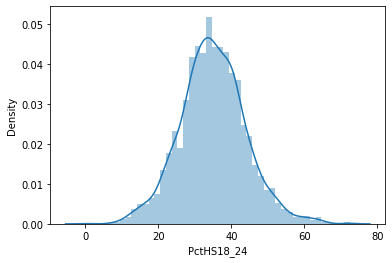

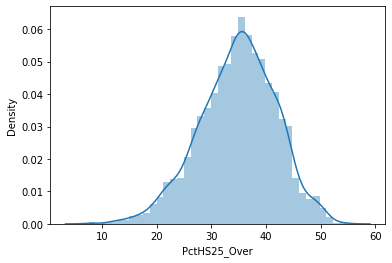

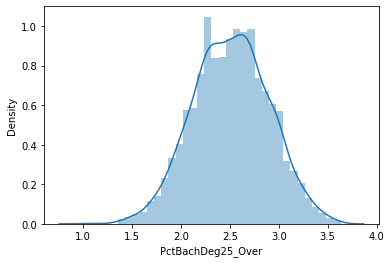

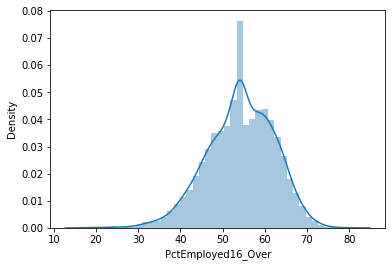

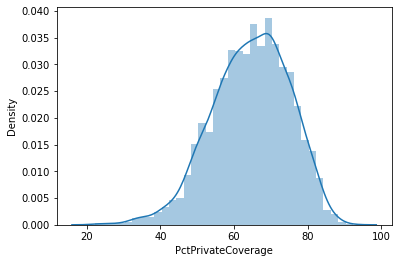

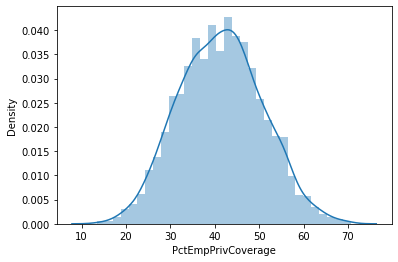

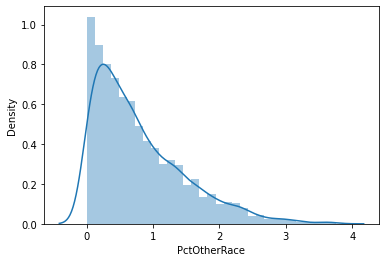

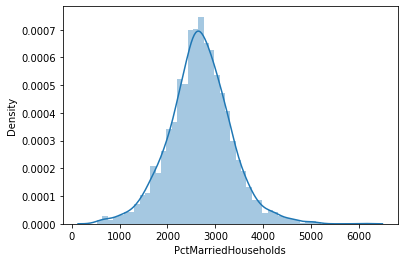

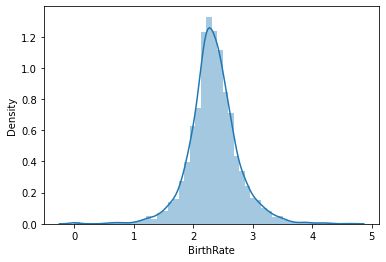

In [351]:
# Distribution of after transformation
for i in tmp_df.columns:
        plt.figure()
        sns.distplot(tmp_df[i])

In [352]:
#Now we have converted all our skewd data to almost normally distributed data
#new we can proceed to building our deep model

### Deep Neural Network Model 

In [353]:
# data split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(tmp_df,np.asarray(y1), test_size = 0.30, random_state = 20)

In [354]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [355]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [360]:
def deep_model() :

  model = Sequential()

  # The Input Layer :
  model.add(Dense(1024, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

  # The Output Layer :
  model.add(Dense(1, kernel_initializer='normal',activation='linear'))

  # Compile the network :
  model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
  model.summary()

  return model

In [361]:
model = deep_model()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 1024)              16384     
                                                                 
 dense_54 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [362]:
#Save only the best model
checkpoint_name = './SavedModel/Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [363]:
#train the model with training set
history = model.fit(X_train, y_train, epochs=500,validation_split = 0.2,callbacks=callbacks_list)

Epoch 1/500
48/53 [==========================>...] - ETA: 0s - loss: 50.2922 - mean_absolute_error: 50.2922
Epoch 00001: val_loss improved from inf to 21.07744, saving model to ./SavedModel/Weights-001--21.07744.hdf5
53/53 [==============================] - 1s 14ms/step - loss: 48.4869 - mean_absolute_error: 48.4869 - val_loss: 21.0774 - val_mean_absolute_error: 21.0774
Epoch 2/500
46/53 [=========================>....] - ETA: 0s - loss: 21.9026 - mean_absolute_error: 21.9026
Epoch 00002: val_loss improved from 21.07744 to 20.57177, saving model to ./SavedModel/Weights-002--20.57177.hdf5
53/53 [==============================] - 0s 7ms/step - loss: 22.1069 - mean_absolute_error: 22.1069 - val_loss: 20.5718 - val_mean_absolute_error: 20.5718
Epoch 3/500
41/53 [======================>.......] - ETA: 0s - loss: 19.6068 - mean_absolute_error: 19.6068
Epoch 00003: val_loss improved from 20.57177 to 18.25481, saving model to ./SavedModel/Weights-003--18.25481.hdf5
53/53 [=====================

In [365]:
from tensorflow.keras.models import load_model 

In [366]:
best_model = load_model('/content/SavedModel/Weights-997--14.95935.hdf5')

In [367]:
def plot_history(history) :

  plt.plot(history.history['mean_absolute_error'])
  plt.plot(history.history['val_mean_absolute_error'])
  plt.title('model error')
  plt.ylabel('ERROR')
  plt.xlabel('EPOCH')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

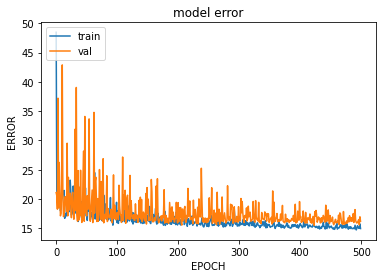

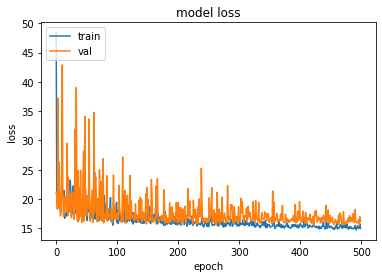

In [368]:
plot_history(history)

**Model Evaluation**

In [ ]:
best_model.evaluate(X_test,y_test)

In [369]:
test_prediction = best_model.predict(X_test)

In [372]:
def plot_performance(y_pred,y_true):

  '''Plot the performance of the testing set
  Arguments :

  y_pred --> Predicted value
  y_test --> Actual value

  Returns: None
  '''
  plt.figure(figsize = (8, 8))
  plt.scatter(y_true, y_pred, c = 'crimson')
  plt.yscale('log')
  plt.xscale('log')

  p1 = max(max(y_pred), max(y_true))
  p2 = min(min(y_pred), min(y_true))
  plt.plot([p1, p2], [p1, p2], 'b-')
  plt.xlabel('True Values', fontsize = 15)
  plt.ylabel('Predictions', fontsize = 15)
  plt.axis('equal')
  plt.show()



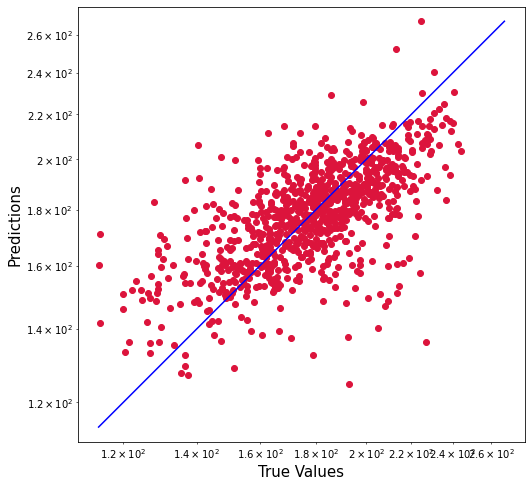

In [373]:
plot_performance(test_prediction,y_test)

We can observed from the above plot that our predicted value is tighly colupled aroud true value